# TRABAJO PRIMER BIMESTRE PROGRAMACION DE ALGORITMOS

Integrantes: Jessica Davila,
             Carlos Saca

In [3]:
#%pylab inline
import seaborn as sns
import pandas as pd
import bokeh
import bokeh.plotting as bp
from bokeh.models import CustomJS, Slider
import numpy as np

pd.set_option('precision', 5)

In [5]:
datos = pd.read_csv("Encuesta_Condiciones_Vida_2013/01_ecv6r_vivienda.csv", 
                        sep=".")


c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (0,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#datos2 = pd.read_csv("Encuesta_Condiciones_Vida_2013/BDD ECV 6R/10_ecv6r_creditos.csv", sep=".")

In [8]:
datos2.plot()

In [6]:
#data
datos.head()

,IDENTIF_SECT,IDENTIF_HOG,AREA_5000,AREA_2000,CIUDAD_AUTO,PROVINCIA,ZDP,REGION,CIUDAD,ZONA,...,CR04,CR05,CR06,CR07,CR08,CR09,CR10,FEXP,REGIONAL,FASE
0,10150002004,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,2,...,780,"00 ""Nada""",Cuota variable,650,600,"Otro, cual",Voucher,"108,6322526",Sur,Fase 1
1,10150002004,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,2,...,480,100,Cuota fija,65,380,Documentos negociables,Pagar�,"108,6322526",Sur,Fase 1
2,10150004008,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,4,...,240,"00 ""Nada""",Cuota fija,240,220,"Otro, cual",Voucher,"101,073869",Sur,Fase 1
3,10150004008,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,4,...,1000,200,Cuota fija,390,800,Documentos negociables,Letra de cambio,"101,073869",Sur,Fase 1
4,10150006007,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,6,...,1000,50,Cuota fija,400,800,Documentos negociables,Pagar�,"90,52687718",Sur,Fase 1


In [120]:
#data.plot()

In [20]:
datos.columns

Index([u'IDENTIF_SECT', u'IDENTIF_HOG', u'AREA_5000', u'AREA_2000',
       u'CIUDAD_AUTO', u'PROVINCIA', u'ZDP', u'REGION', u'CIUDAD', u'ZONA',
       ...
       u'AM1703C', u'AM1704A', u'AM1704B', u'AM1704C', u'AM1705A', u'AM1705B',
       u'AM1705C', u'FEXP', u'REGIONAL', u'FASE'],
      dtype='object', length=166)

In [21]:
datos['PROVINCIA'].unique()[:24]

array(['Azuay', 'Bolivar', 'Ca\xf1ar', 'Carchi', 'Cotopaxi', 'Chimborazo',
       'El Oro', 'Esmeraldas', 'Guayas', 'Imbabura', 'Loja', 'Los Rios',
       'Manabi', 'Morona Santiago', 'Napo', 'Pastaza', 'Pichincha',
       'Tungurahua', 'Zamora Chinchipe', 'Gal\xe1pagos', 'Sucumbios',
       'Orellana', 'Santo Domingo de los Tsachilas', 'Santa Elena'], dtype=object)

In [92]:
index_pro_datos = datos.set_index("PROVINCIA","REGIONAL").sort_index()

In [93]:
datos['PROVINCIA'].describe()

count      28970
unique        24
top       Guayas
freq        3082
Name: PROVINCIA, dtype: object

In [66]:
index_pro_datos.loc[
                    ["El Oro","Loja","Zamora Chinchipe"],
                    ['ZDP','VI03','VI04','VI05','VI06A','VI37']
                  ].head(5)

,ZDP,VI03,VI04,VI05,VI06A,VI37
PROVINCIA,,,,,,
El Oro,Zona 7,Zinc,Ca�a sin revestir,Tabla / tabl�n no tratado,Bueno,
El Oro,Zona 7,Asbesto (Eternit),Asbesto / cemento,Cemento / ladrillo,Regular,
El Oro,Zona 7,Zinc,Bloque /ladrillo,Cer�mica / baldosa / vinyl,Regular,
El Oro,Zona 7,Hormig�n / losa / cemento,Bloque /ladrillo,Cer�mica / baldosa / vinyl,Bueno,
El Oro,Zona 7,Zinc,Ca�a sin revestir,Tierra,Malo,


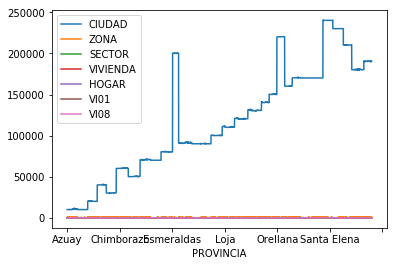

In [69]:

index_pro_datos.plot()

In [110]:
datos_z7 = datos.set_index(["ZDP"],["PROVINCIA","REGIONAL"],["VI03","VI04","VI05"]).sort_index()
#agrupar_zona = datos_z7.groupby("PROVINCIA").sum()
agrupar_zona.columns

Index([u'CIUDAD', u'ZONA', u'SECTOR', u'VIVIENDA', u'HOGAR', u'VI01', u'VI08'], dtype='object')

In [111]:
agrupar_zona.head()


,CIUDAD,ZONA,SECTOR,VIVIENDA,HOGAR,VI01,VI08
PROVINCIA,,,,,,,
Azuay,20142172,845354,21482,12608,1960,1969,7285
Bolivar,18350212,674976,19876,5868,908,912,2979
Carchi,34894276,477946,5332,5639,868,871,2687
Ca�ar,28652750,595038,7951,6134,947,949,3373
Chimborazo,69232258,772596,20852,7445,1150,1153,3589


In [91]:
datos_z7.head()

,,IDENTIF_SECT,IDENTIF_HOG,AREA_5000,AREA_2000,CIUDAD_AUTO,PROVINCIA,REGION,CIUDAD,ZONA,SECTOR,...,AM1703C,AM1704A,AM1704B,AM1704C,AM1705A,AM1705B,AM1705C,FEXP,REGIONAL,FASE
,ZDP,,,,,,,,,,,,,,,,,,,,,
0,Zona 6,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
1,Zona 6,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
2,Zona 6,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
3,Zona 6,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
4,Zona 6,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1


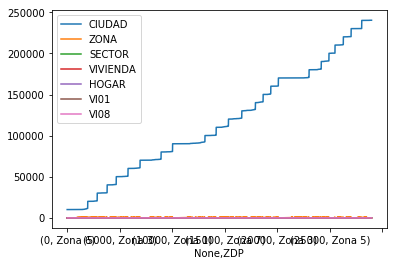

In [94]:
datos_z7.plot()